# 1 Veri Seti İncelemesi

In [24]:
# sklearn: ML Library
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
cancer = load_breast_cancer()

df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
df["target"] = cancer.target

# 2 Makine Öğrenmesi Modelinin Seçilmesi - KNN Sınıflandırıcısı

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

X = cancer.data
y = cancer.target

knn.fit(X,y) # fit modeli eğitir

KNeighborsClassifier(n_neighbors=3)

# 3 Modelin Train Edilmesi

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [20]:
# Ölçeklendirme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#4 Sonuçların Değerlendirilmesi  

In [21]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.631578947368421

In [23]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[  0,  63],
       [  0, 108]])

# 5 Hiperparametre Ayarlaması

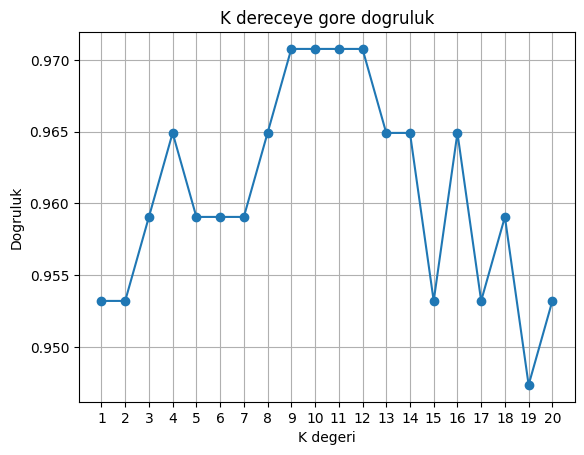

In [27]:
accuracy_values = []  # Doğruluk değerlerini tutacak liste
k_values = []  # K değeri (k-Nearest Neighbors) için list

for k in range(1, 21):  # 1'den 20'ye kadar olan K değerleri için döngü
    knn = KNeighborsClassifier(n_neighbors=k)  # KNN sınıflandırıcısı oluştur
    knn.fit(X_train, y_train)  # Modeli eğitim verisi ile eğit
    y_pred = knn.predict(X_test)  # Test verisi ile tahmin yap
    accuracy = accuracy_score(y_test, y_pred)  # Tahmin doğruluğunu ölç
    accuracy_values.append(accuracy)  # Doğruluk değerlerini listeye ekle
    k_values.append(k)  # K değerini listeye ekle

# Sonuçları görselleştir
plt.figure()  # Yeni bir figür oluştur
plt.plot(k_values, accuracy_values, marker="o", linestyle="-")  # K ve doğru oranlarını çiz
plt.title("K dereceye gore dogruluk")  # Grafik başlığı
plt.xlabel("K degeri")  # X ekseni etiketi
plt.ylabel("Dogruluk")  # Y ekseni etiketi
plt.xticks(k_values)  # X ekseninde K değerleri göster
plt.grid(True)  # ızgara çizgileri göster